In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Run the following two cells before you begin.**

In [58]:
%autosave 10

Autosaving every 10 seconds


In [59]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [60]:
# Import the data set
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [61]:
# Create a train/test split
from sklearn.model_selection import train_test_split
df = df_train[['PAY_1','LIMIT_BAL','default payment next month']]
X  = df_train[['PAY_1','LIMIT_BAL']]
X  = np.array(X)
y  = df_train['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train.shape, X_test.shape ,y_train.shape , X_test.shape

((21331, 2), (5333, 2), (21331,), (5333, 2))

______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [62]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [63]:
# Fit the logistic regression model on training data
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# Make predictions using `.predict()`
# predictiing the test result
y_pred = classifier.predict(X_test)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
classifier.classes_

array([0, 1])

In [67]:
# Find class probabilities using `.predict_proba()`
y_pred_prob= classifier.predict_proba(X_test)

In [68]:
y_pred_prob

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393435, 0.33606565]])

classification_report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4178
           1       0.00      0.00      0.00      1155

    accuracy                           0.78      5333
   macro avg       0.39      0.50      0.44      5333
weighted avg       0.61      0.78      0.69      5333

confusion matrix:
 [[4178    0]
 [1155    0]]
accuracy_score: 0.7834239639977498


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


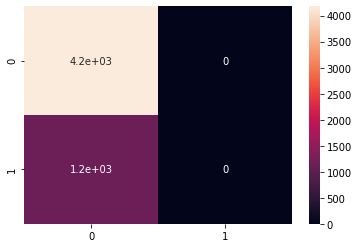

In [69]:
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print('classification_report:\n',classification_report(y_test,y_pred))
print('confusion matrix:\n',cm)
print('accuracy_score:',accuracy_score(y_test,y_pred))

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [70]:
# Add column of 1s to features
#np.ones((X_test.shape[0],1)).shape

In [71]:
new_fe=np.hstack([np.ones((X_test.shape[0],1)),X_test])
new_fe

array([[ 1.0e+00,  2.0e+00,  1.6e+05],
       [ 1.0e+00,  1.0e+00,  5.0e+04],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00, -1.0e+00,  5.0e+04],
       [ 1.0e+00,  1.0e+00,  2.3e+05],
       [ 1.0e+00,  2.0e+00,  1.0e+05]])

In [72]:
# Get coefficients and intercepts from trained model
a = classifier.coef_
print(a)
b = classifier.intercept_
print(b)

[[ 8.27451187e-11 -6.80876727e-06]]
[-6.57647457e-11]


In [73]:
combined=np.concatenate([b.reshape(1,1),a],axis=1)
combined

array([[-6.57647457e-11,  8.27451187e-11, -6.80876727e-06]])

In [74]:
# Manually calculate predicted probabilities
pred_proba=np.dot(combined,np.transpose(new_fe))
pred_proba

array([[-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
        -1.56601647, -0.68087673]])

In [75]:
def sigmoid(X):
    z=1/(1/1+np.exp(-X))
    return z

In [76]:
new_proba= sigmoid(pred_proba)
new_proba

array([[0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
        0.33606565]])

In [77]:
new_proba.shape

(1, 5333)

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [78]:
# Manually calculate predicted classes
proba_cls=new_proba >=0.5
proba_cls.shape

(1, 5333)

In [79]:
y_pred.shape

(5333,)

In [80]:
# Compare to scikit-learn's predicted classes
y_prediction_test = classifier.predict(X_test)
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - new_proba)) * 100))

test accuracy: 72.73274649943448 %


In [82]:
new_proba=new_proba[0,:]

In [81]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,new_proba)

0.627207450280691

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

0.627207450280691


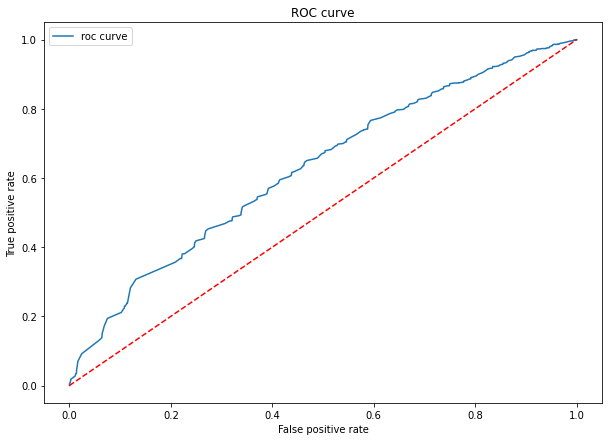

In [85]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test , y_pred_prob[:,1]))


from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , y_pred_prob[:,1])
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [86]:
pred_proba.reshape(pred_proba.shape[1])

array([-1.08940276, -0.34043836, -1.36175345, ..., -0.34043836,
       -1.56601647, -0.68087673])

In [87]:
# Use manually calculated predicted probabilities to calculate ROC AUC

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test , new_proba))

0.627207450280691


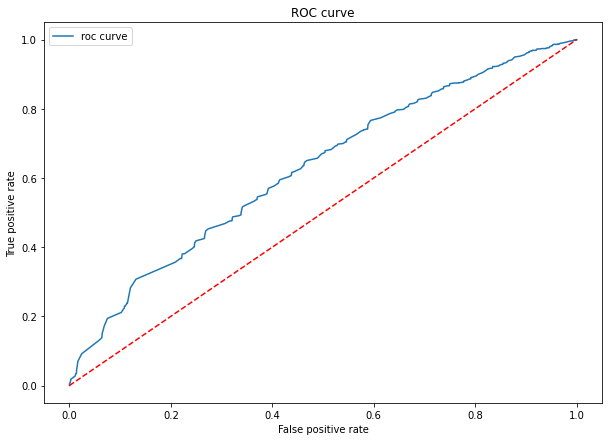

In [88]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , new_proba)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()